In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_excel('Admission_Prediction.xlsx')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


## Basic checks and Data cleaning

In [3]:
data.drop('Serial No.', axis=1, inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          485 non-null    float64
 1   TOEFL Score        490 non-null    float64
 2   University Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    float64
 7   Chance of Admit    500 non-null    float64
dtypes: float64(8)
memory usage: 31.4 KB


In [5]:
data.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
# Replacing Null values with the mean of that column
data['GRE Score'] = data['GRE Score'].replace( np.NaN, data['GRE Score'].mean())
data['TOEFL Score'] = data['TOEFL Score'].replace( np.NaN, data['TOEFL Score'].mean())
data['University Rating'] = data['University Rating'].replace( np.NaN, data['University Rating'].mean())

In [7]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0.0,0.65


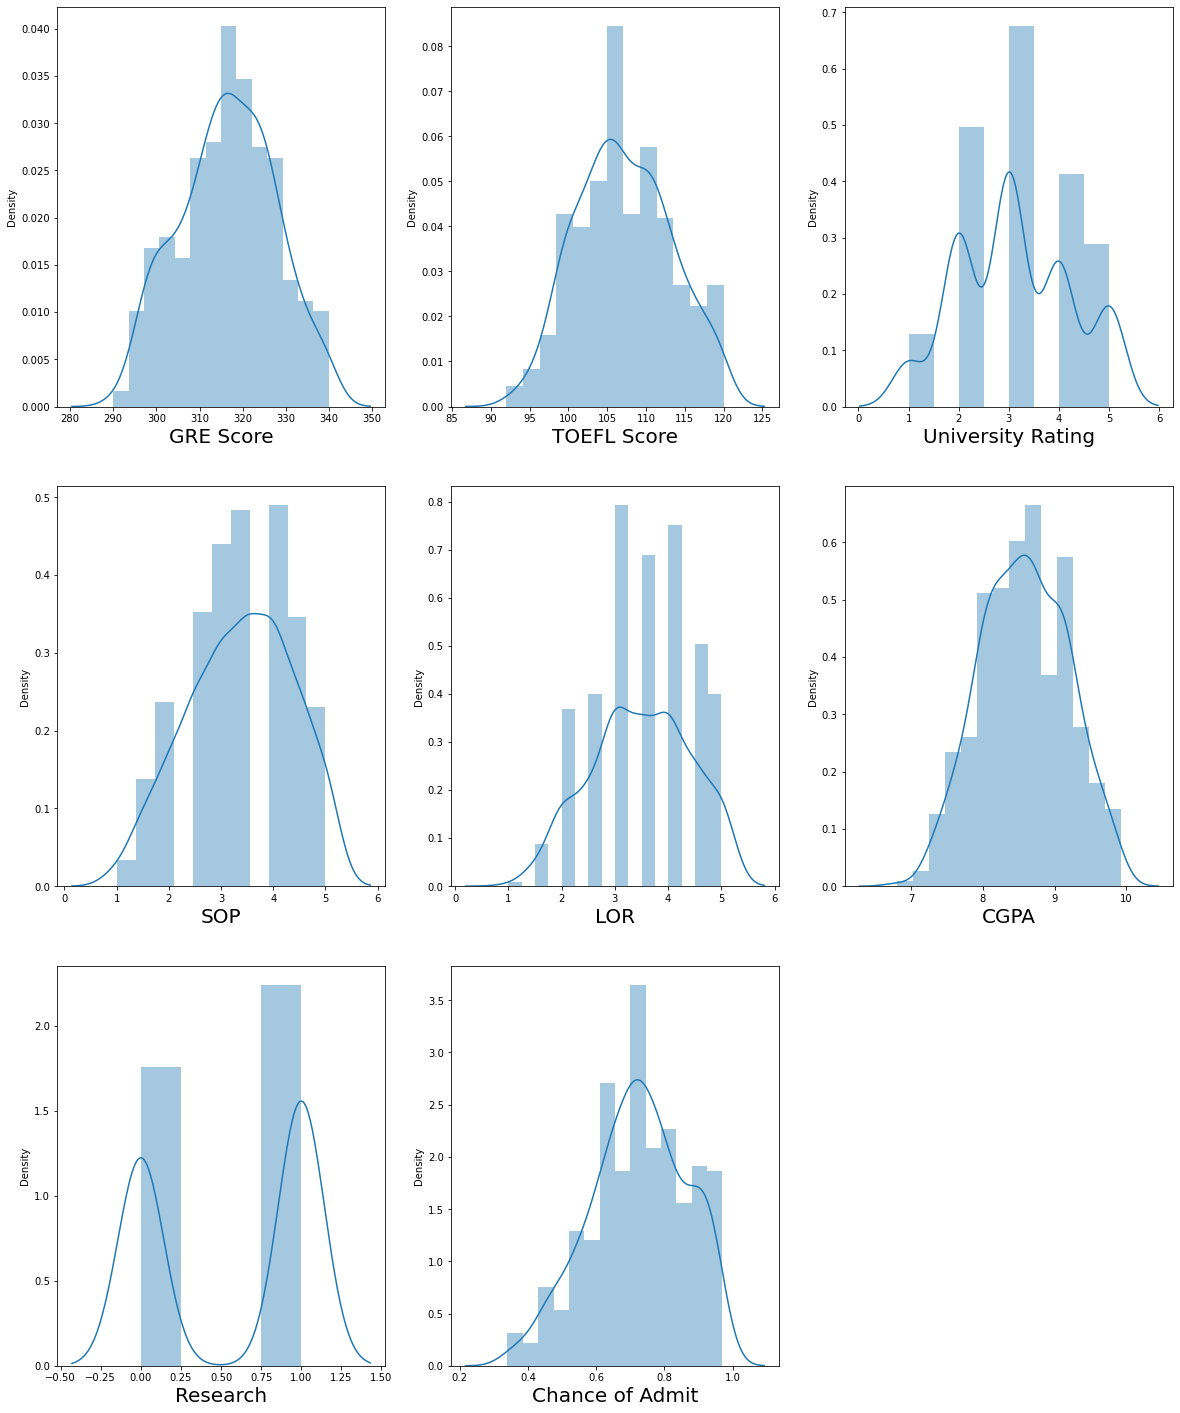

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [11]:
### Split X and Y
X = data.drop(columns = ['Chance of Admit'])
Y = data['Chance of Admit']

In [12]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [13]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [14]:
## splitting the training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=42)

In [15]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.08901685233707154
RMSE value for k=  2 is: 0.07624172086200574
RMSE value for k=  3 is: 0.07304610416259949
RMSE value for k=  4 is: 0.06892133196623525
RMSE value for k=  5 is: 0.06691821874497257
RMSE value for k=  6 is: 0.06756281028297545
RMSE value for k=  7 is: 0.06695987223551071
RMSE value for k=  8 is: 0.06633843154612566
RMSE value for k=  9 is: 0.06716517322115055
RMSE value for k=  10 is: 0.0671493857008387
RMSE value for k=  11 is: 0.06622990261203772
RMSE value for k=  12 is: 0.06630707185344396
RMSE value for k=  13 is: 0.06600953848950646
RMSE value for k=  14 is: 0.06609279191301533
RMSE value for k=  15 is: 0.06639491279039716
RMSE value for k=  16 is: 0.06575575069908333
RMSE value for k=  17 is: 0.06619526530492136
RMSE value for k=  18 is: 0.06636673270454514
RMSE value for k=  19 is: 0.06601027369044139
RMSE value for k=  20 is: 0.06588747984253154


In [16]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(X_train,Y_train)# Predict 
Y_pred = knn.predict(X_test)

In [17]:
Y_pred

array([0.91375 , 0.8     , 0.614375, 0.689375, 0.79375 , 0.846875,
       0.53375 , 0.66875 , 0.80125 , 0.800625, 0.69625 , 0.70375 ,
       0.670625, 0.936875, 0.79375 , 0.51    , 0.86    , 0.6425  ,
       0.52125 , 0.609375, 0.685   , 0.57125 , 0.729375, 0.750625,
       0.784375, 0.595   , 0.940625, 0.85125 , 0.66125 , 0.78125 ,
       0.5825  , 0.691875, 0.596875, 0.853125, 0.700625, 0.734375,
       0.545625, 0.909375, 0.663125, 0.718125, 0.9425  , 0.64125 ,
       0.6675  , 0.853125, 0.93    , 0.595625, 0.936875, 0.8075  ,
       0.808125, 0.926875, 0.900625, 0.61875 , 0.731875, 0.55125 ,
       0.94125 , 0.654375, 0.930625, 0.694375, 0.67125 , 0.558125,
       0.613125, 0.685   , 0.616875, 0.633125, 0.495   , 0.653125,
       0.85    , 0.9075  , 0.660625, 0.68875 , 0.668125, 0.780625,
       0.684375, 0.586875, 0.5275  , 0.674375, 0.781875, 0.86875 ,
       0.526875, 0.688125, 0.695   , 0.87875 , 0.6275  , 0.83125 ,
       0.739375, 0.704375, 0.630625, 0.75375 , 0.785   , 0.650

In [18]:
X_test.shape

(125, 7)

In [19]:
Y_pred.shape

(125,)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
R2Score =  r2_score(Y_test,Y_pred)
print(R2Score)
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))


0.7785127894453089
MSE:  0.004323818749999998
MAE:  0.048119999999999996


In [21]:
test_adjusted_r2 = 1-(1-0.77)*(125-1)/(125-7-1)
test_adjusted_r2

0.7562393162393163